In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("ALProjekt-Survey.csv")
#print(df.head)

In [2]:
df

,Zeitstempel,What is your age?,Education level:,How do you judge your experience in informatics (IT) in general:,How experienced are you with machine learning/ deep learning?,How did you find these aspects of the website? [Visual appearance],How did you find these aspects of the website? [Usability],How did you find these aspects of the website? [Structure/Clarity of elements],How understandable was the task you had to do?,How intuitive did you find the workflow?,How did you like the statistics page? [Helpfulness],How did you like the statistics page? [Visual appearance],How did you like the statistics page? [Understandability of the values],Understandability of the metric values?,Helpfulness of metric tool tips?,Did you use the metric for selecting the samples you labeled?,Do you think you improved the system?,(optional) Further notes on the pratical part:,Further general notes:
0,2021/04/26 11:28:05 AM OEZ,22-29,Master's degree,5,5,5,4,2,5,5,3.0,5.0,5.0,5,4,Yes,Yes,it is not clear whether lower is better in ter...,NaN
1,2021/04/26 3:38:43 PM OEZ,22-29,"Doctoral or professional degree (e.g. PhD, M.D...",4,4,4,4,4,4,4,3.0,3.0,3.0,3,3,Yes,No,NaN,NaN
2,2021/04/26 5:42:29 PM OEZ,22-29,Master's degree,1,1,5,4,4,5,4,3.0,3.0,3.0,4,3,Yes,I don't understand the system's performance,How did you like the statistics page? *\nONLY ...,NaN
3,2021/04/27 11:46:14 AM OEZ,22-29,Bachelor's degree,3,2,4,3,5,4,4,4.0,4.0,4.0,5,4,No,Yes,NaN,NaN
4,2021/04/27 4:02:22 PM OEZ,30-39,Master's degree,5,5,5,4,4,3,3,NaN,NaN,NaN,4,4,Yes,I don't understand the system's performance,Unfortunately it was not possible for me to un...,NaN
5,2021/04/28 12:26:02 AM OEZ,22-29,Bachelor's degree,4,2,4,5,5,4,5,NaN,NaN,NaN,3,3,No,Yes,A more in-depth introduction to the system wou...,NaN
6,2021/04/28 9:52:51 PM OEZ,22-29,High school(Hauptschule/Realschule/Gynasium),3,1,3,3,3,5,4,NaN,NaN,NaN,2,4,Yes,Yes,NaN,NaN
7,2021/04/28 11:44:59 PM OEZ,18-21,Bachelor's degree,5,2,2,2,4,4,4,NaN,NaN,NaN,3,4,Yes,I don't understand the system's performance,If you ask about the system and if I improved ...,NaN
8,2021/04/29 1:53:47 PM OEZ,22-29,Bachelor's degree,4,2,3,2,4,5,2,NaN,NaN,NaN,3,3,No,I don't understand the system's performance,NaN,NaN
9,2021/05/01 10:34:25 AM OEZ,22-29,Master's degree,4,4,4,3,2,4,3,NaN,NaN,NaN,3,2,No,I don't understand the system's performance,NaN,NaN


In [3]:
#df = df.drop(0)

In [4]:
df.rename(columns={df.columns[1]:"Age", df.columns[2]:"Education", df.columns[3]:"IT skills" ,df.columns[4]:"ML skills" ,df.columns[5]:"website-" ,df.columns[6]:"Age" ,df.columns[7]:"Age"})

,Zeitstempel,Age,Education,IT skills,ML skills,website-,Age,Age,How understandable was the task you had to do?,How intuitive did you find the workflow?,How did you like the statistics page? [Helpfulness],How did you like the statistics page? [Visual appearance],How did you like the statistics page? [Understandability of the values],Understandability of the metric values?,Helpfulness of metric tool tips?,Did you use the metric for selecting the samples you labeled?,Do you think you improved the system?,(optional) Further notes on the pratical part:,Further general notes:
0,2021/04/26 11:28:05 AM OEZ,22-29,Master's degree,5,5,5,4,2,5,5,3.0,5.0,5.0,5,4,Yes,Yes,it is not clear whether lower is better in ter...,NaN
1,2021/04/26 3:38:43 PM OEZ,22-29,"Doctoral or professional degree (e.g. PhD, M.D...",4,4,4,4,4,4,4,3.0,3.0,3.0,3,3,Yes,No,NaN,NaN
2,2021/04/26 5:42:29 PM OEZ,22-29,Master's degree,1,1,5,4,4,5,4,3.0,3.0,3.0,4,3,Yes,I don't understand the system's performance,How did you like the statistics page? *\nONLY ...,NaN
3,2021/04/27 11:46:14 AM OEZ,22-29,Bachelor's degree,3,2,4,3,5,4,4,4.0,4.0,4.0,5,4,No,Yes,NaN,NaN
4,2021/04/27 4:02:22 PM OEZ,30-39,Master's degree,5,5,5,4,4,3,3,NaN,NaN,NaN,4,4,Yes,I don't understand the system's performance,Unfortunately it was not possible for me to un...,NaN
5,2021/04/28 12:26:02 AM OEZ,22-29,Bachelor's degree,4,2,4,5,5,4,5,NaN,NaN,NaN,3,3,No,Yes,A more in-depth introduction to the system wou...,NaN
6,2021/04/28 9:52:51 PM OEZ,22-29,High school(Hauptschule/Realschule/Gynasium),3,1,3,3,3,5,4,NaN,NaN,NaN,2,4,Yes,Yes,NaN,NaN
7,2021/04/28 11:44:59 PM OEZ,18-21,Bachelor's degree,5,2,2,2,4,4,4,NaN,NaN,NaN,3,4,Yes,I don't understand the system's performance,If you ask about the system and if I improved ...,NaN
8,2021/04/29 1:53:47 PM OEZ,22-29,Bachelor's degree,4,2,3,2,4,5,2,NaN,NaN,NaN,3,3,No,I don't understand the system's performance,NaN,NaN
9,2021/05/01 10:34:25 AM OEZ,22-29,Master's degree,4,4,4,3,2,4,3,NaN,NaN,NaN,3,2,No,I don't understand the system's performance,NaN,NaN


In [5]:
def get_counts(array):
    return np.array([(array==1).sum(), (array==2).sum(), (array==3).sum(), (array==4).sum(), (array==5).sum()])

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color,)
        plt.yticks(labels, labels)
        ax.tick_params(axis='both', which='major', labelsize=14)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.1 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color, fontsize=14)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='larger')

    return fig, ax

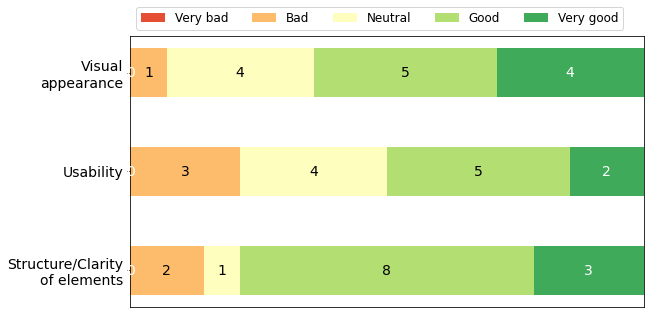

In [6]:

## website page data
category_names = ['Very bad', 'Bad',
                  'Neutral', 'Good', 'Very good']

results = {
    "Visual\nappearance": get_counts(df[df.columns[5]].to_numpy()),
    "Usability": get_counts(df[df.columns[6]].to_numpy()),
    "Structure/Clarity\nof elements": get_counts(df[df.columns[7]].to_numpy()),
} 
survey(results, category_names)
plt.savefig("survey_website_bar.pdf")

In [7]:
print("Mean: ",np.mean(df[df.columns[8]].to_numpy()))
print("Std.dev: ", np.std(df[df.columns[8]].to_numpy()))

Mean:  4.357142857142857
Std.dev:  0.610285981808395


Means 3.6
3.6
3.8
SDs: 0.47915742374995485
0.8
0.7483314773547882


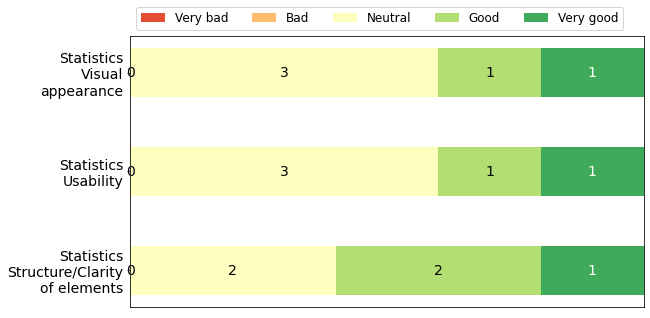

In [8]:
## statistic page data
category_names = ['Very bad', 'Bad',
                  'Neutral', 'Good', 'Very good']

vis = df[df.columns[10]].to_numpy()
usa = df[df.columns[11]].to_numpy()
struc = df[df.columns[12]].to_numpy()

results = {
    "Statistics\nVisual\nappearance": get_counts(df[df.columns[10]].to_numpy()),
    "Statistics\nUsability": get_counts(df[df.columns[11]].to_numpy()),
    "Statistics\nStructure/Clarity\nof elements": get_counts(df[df.columns[12]].to_numpy()),
} 
survey(results, category_names)
print("Means {}\n{}\n{}".format(np.mean(vis[~np.isnan(vis)]), np.mean(usa[~np.isnan(usa)]), np.mean(struc[~np.isnan(struc)])))
print("SDs: {}\n{}\n{}".format(np.std([~np.isnan(vis)]), np.std(usa[~np.isnan(usa)]), np.std(struc[~np.isnan(struc)])))
plt.savefig("survey_statistics_bar.pdf", bbox_inches='tight')

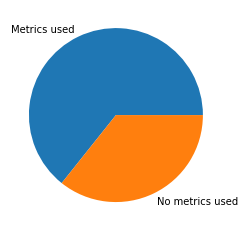

In [9]:
#metric 

#metric cake diagram
yes_bool = (df[df.columns[15]].to_numpy()=="Yes")
plt.pie(np.array([yes_bool.sum(), (df[df.columns[15]].to_numpy()=="No").sum()]), labels=["Metrics used", "No metrics used"], labeldistance=1.1)
plt.savefig("survey_metric_pie.pdf")


Means 3.3333333333333335
3.4444444444444446
SDs: 0.0
1.0657403385139377


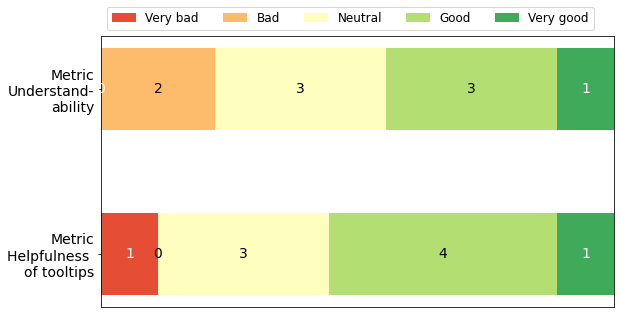

In [10]:
category_names = ['Very bad', 'Bad',
                  'Neutral', 'Good', 'Very good']

#only collect metric ratings of people that used them
results = {
    "Metric\nUnderstand-\nability": get_counts(df[df.columns[13]][yes_bool].to_numpy()), 
    "Metric\nHelpfulness \nof tooltips": get_counts(df[df.columns[14]][yes_bool].to_numpy()),
} 

vis = df[df.columns[13]][yes_bool].to_numpy()
usa = df[df.columns[14]][yes_bool].to_numpy()

print("Means {}\n{}".format(np.mean(vis[~np.isnan(vis)]), np.mean(usa[~np.isnan(usa)])))
print("SDs: {}\n{}".format(np.std([~np.isnan(vis)]), np.std(usa[~np.isnan(usa)])))

survey(results, category_names)
plt.savefig("survey_metric_bar.pdf", bbox_inches='tight')


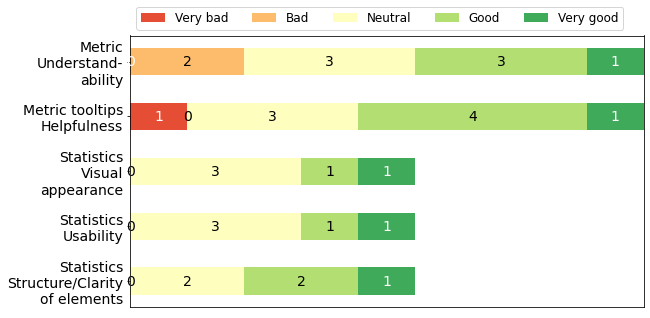

In [11]:
#Metric/Statistics combined
category_names = ['Very bad', 'Bad',
                  'Neutral', 'Good', 'Very good']

results = {
    "Metric\nUnderstand-\nability": get_counts(df[df.columns[13]][yes_bool].to_numpy()),
    "Metric tooltips\nHelpfulness": get_counts(df[df.columns[14]][yes_bool].to_numpy()),
    "Statistics\nVisual\nappearance": get_counts(df[df.columns[10]].to_numpy()),
    "Statistics\nUsability": get_counts(df[df.columns[11]].to_numpy()),
    "Statistics\nStructure/Clarity\nof elements": get_counts(df[df.columns[12]].to_numpy()),
} 
survey(results, category_names)
plt.savefig("survey_metric_stats_bar.pdf")


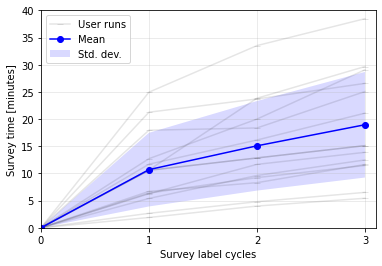

In [12]:
import json
from datetime import datetime
#time plot
start_times = []
time_cyc_1 = []
time_cyc_2 = []
time_cyc_3 = []

for i in range(1, len(df)+1):
    if i != 5: #exclude participant 5 as there was issues with the result submission and no data was obtained
        f_nr = "{:02d}".format(i)
        
        with open("./UserDataJson/"+f_nr+".json", "r") as f_handler:
            f_json = json.load(f_handler)
            t_start = f_json["startClickTime"]
            dt_start = datetime.strptime(t_start, "%m-%d-%Y_%H:%M:%S")
            start_times.append(dt_start)
            dt_1 = datetime.strptime(f_json["1"]["time"], "%m-%d-%Y_%H:%M:%S")
            time_cyc_1.append((dt_1- dt_start).total_seconds() / 60)
            dt_2 = datetime.strptime(f_json["2"]["time"], "%m-%d-%Y_%H:%M:%S")
            time_cyc_2.append((dt_2 - dt_start).total_seconds() / 60)
            dt_3 = datetime.strptime(f_json["3"]["time"], "%m-%d-%Y_%H:%M:%S")
            time_cyc_3.append((dt_3- dt_start).total_seconds() / 60)
    plt.plot([0, time_cyc_1[-1], time_cyc_2[-1], time_cyc_3[-1]], '_-k', alpha=0.1, label = "User runs" if i==1 else None)

mean_data = np.array([0, np.mean(time_cyc_1), np.mean(time_cyc_2), np.mean(time_cyc_3)])
std_data_lower = mean_data-np.array([0, np.std(time_cyc_1), np.std(time_cyc_2), np.std(time_cyc_3)])
std_data_upper = mean_data+np.array([0, np.std(time_cyc_1), np.std(time_cyc_2), np.std(time_cyc_3)])
plt.fill_between([0, 1, 2, 3],std_data_lower, std_data_upper, facecolor='blue', alpha=0.15, label="Std. dev.")
plt.plot(mean_data, 'o-b', label="Mean")
plt.xlabel("Survey label cycles")
plt.ylabel("Survey time [minutes]")
ax = plt.gca()
from matplotlib.ticker import ScalarFormatter, MultipleLocator
ax.set_xlim([0,3.1])
ax.set_ylim([0,40])
ax.set_yticks(np.arange(0,45, 5))
ax.set_xticks(range(0,4))
ax.legend()
plt.grid(True, alpha=0.3)
plt.savefig("survey_time_plot.pdf")


In [13]:
mean_data[1:]

array([10.7       , 15.07948718, 18.95897436])

In [14]:
def get_counts(array):
    return np.array([(array==1).sum(), (array==2).sum(), (array==3).sum(), (array==4).sum(), (array==5).sum()])
counts = get_counts(df[df.columns[5]].to_numpy())
counts

array([0, 1, 4, 5, 4])

In [15]:

df[df.columns[8]].to_numpy()
df[df.columns[8]].to_numpy().shape

(14,)

In [16]:

df[df.columns[6]].to_numpy()


array([4, 4, 4, 3, 4, 5, 3, 2, 2, 3, 4, 2, 5, 3], dtype=int64)

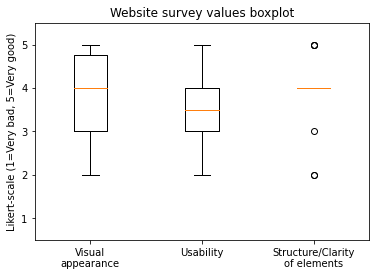

In [17]:

## box plot website
fig1, ax1 = plt.subplots()
ax1.set_title('Website survey values boxplot')
ax1.set_yticks([0, 1, 2, 3, 4, 5])

category_names = ['Very bad', 'Bad',
                  'Neutral', 'Good', 'Very good']
data = [df[df.columns[5]].to_numpy(), df[df.columns[6]].to_numpy(), df[df.columns[7]].to_numpy()]

ax1.boxplot(data)
ax1.set_ylim([0.5, 5.5])

ax1.set_ylabel("Likert-scale (1=Very bad, 5=Very good)")
ax1.set_xticklabels(["Visual\nappearance","Usability", "Structure/Clarity\nof elements"])
#ax1.set_xlabel(["Visual\nappearance","Usability", "Structure/Clarity\nof elements"])
plt.savefig("survey_website_box.pdf")

In [18]:
np.mean(usa[~np.isnan(usa)])

3.4444444444444446

[3. 3. 3. 4. 5.]


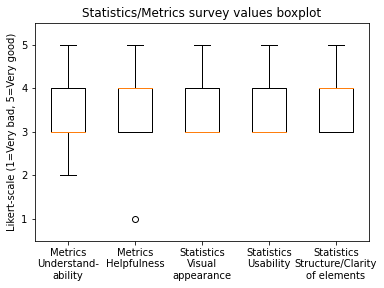

In [19]:
## box plot metric
fig1, ax1 = plt.subplots()
ax1.set_title('Statistics/Metrics survey values boxplot')
ax1.set_yticks([0, 1, 2, 3, 4, 5])

und = df[df.columns[13]][yes_bool].to_numpy()
hel = df[df.columns[14]][yes_bool].to_numpy()
vis = df[df.columns[10]].to_numpy()
usa = df[df.columns[11]].to_numpy()
struc = df[df.columns[12]].to_numpy()
print(vis[~np.isnan(vis)])
data = [und[~np.isnan(und)], hel[~np.isnan(hel)],vis[~np.isnan(vis)], usa[~np.isnan(usa)], struc[~np.isnan(struc)]]

ax1.boxplot(data)
ax1.set_ylim([0.5, 5.5])
#ax1.set_yticks(np.arange(0.5, 5.5, 0.1))

ax1.set_ylabel("Likert-scale (1=Very bad, 5=Very good)")
ax1.set_xticklabels(["Metrics\nUnderstand-\nability","Metrics\nHelpfulness", "Statistics\nVisual\nappearance","Statistics\nUsability", "Statistics\nStructure/Clarity\nof elements"])
#ax1.set_xlabel(["Visual\nappearance","Usability", "Structure/Clarity\nof elements"])
plt.savefig("survey_metric_stat_box.pdf")

[3. 3. 3. 4. 5.]


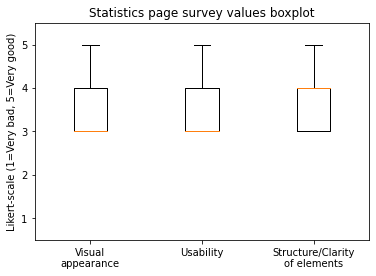

In [20]:
## box plot statistics
fig1, ax1 = plt.subplots()
ax1.set_title('Statistics page survey values boxplot')
ax1.set_yticks([0, 1, 2, 3, 4, 5])

vis = df[df.columns[10]].to_numpy()
usa = df[df.columns[11]].to_numpy()
struc = df[df.columns[12]].to_numpy()
print(vis[~np.isnan(vis)])
data = [vis[~np.isnan(vis)], usa[~np.isnan(usa)], struc[~np.isnan(struc)]]
ax1.boxplot(data)
ax1.set_ylabel("Likert-scale (1=Very bad, 5=Very good)")
ax1.set_ylim([0.5, 5.5])
ax1.set_xticklabels(["Visual\nappearance","Usability", "Structure/Clarity\nof elements"])
#ax1.set_xlabel(["Visual\nappearance","Usability", "Structure/Clarity\nof elements"])
plt.savefig("survey_statistics_box.pdf")